# Clusterring

## K-Means

works by finding centeroids to the data

In [419]:
import numpy as np
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [420]:
X.shape

(2000, 2)

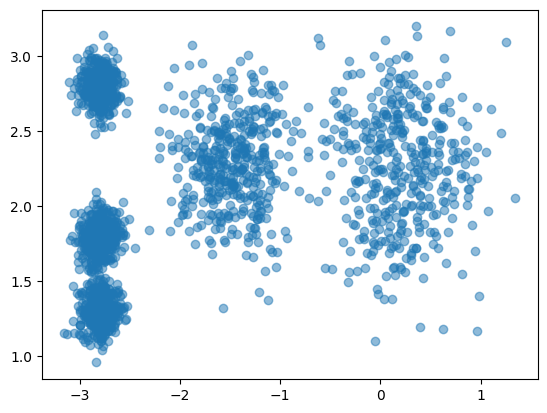

In [421]:
import matplotlib.pyplot as plt
plt.scatter(X.T[0], X.T[1], alpha=0.5)

In [422]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [423]:
y_pred.shape

(2000,)

In [424]:
kmeans.labels_

array([4, 0, 1, ..., 3, 1, 0])

we can look at the five centroids that the algorithm found

In [425]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [426]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. In the KMeans class, the transform() method measures the distance from each instance to every centroid

In [427]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

### Centroid initialization methods

if we know the centroids, we can set init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1

In [428]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [429]:
kmeans.inertia_

211.59853725816836

score() returns the negative inertia, because predictor's score() method must always respect scikit-learn's "greater is better" rule

In [430]:
kmeans.score(X)

-211.59853725816834

another solution is to run the algorithm multiple times with different random initializations

we can do that by n_init hyperparameter. by default it is set to 10

scikit-learn uses this method by default. the centroid initialization is not that random also, it uses K-means++ approach

### Accelerated K-Means and mini-batch K-Means

Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration.

In [431]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### Finding the optimal number of clusters

we can use inertia but that is not a good metric

another more precise approach is silhouette score

In [432]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using Clustering for Image Segmentation

In [433]:
import os
from matplotlib.image import imread # or `from imageio import imread`
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))

In [434]:
image.shape

(533, 800, 3)

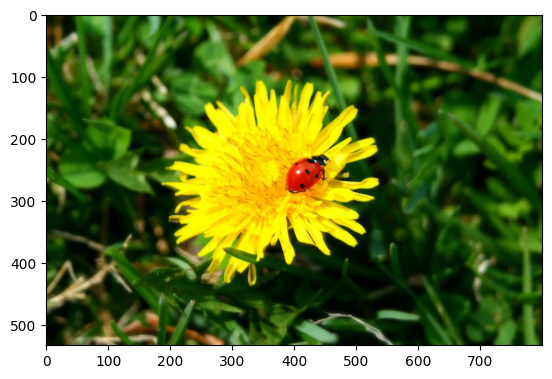

In [435]:
plt.imshow(image)

In [436]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [437]:
kmeans.labels_.shape

(426400,)

In [438]:
kmeans.cluster_centers_

array([[0.13417862, 0.26592347, 0.04023499],
       [0.86293936, 0.80190057, 0.1042937 ]], dtype=float32)

In [439]:
kmeans.cluster_centers_[[0,0,0,1]]

array([[0.13417862, 0.26592347, 0.04023499],
       [0.13417862, 0.26592347, 0.04023499],
       [0.13417862, 0.26592347, 0.04023499],
       [0.86293936, 0.80190057, 0.1042937 ]], dtype=float32)

In [440]:
X.shape

(426400, 3)

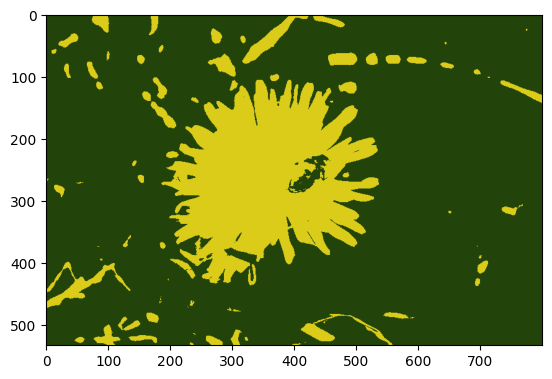

In [441]:
plt.imshow(segmented_img)

In [442]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [443]:
np.array(segmented_imgs).shape

(5, 533, 800, 3)

## Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction

In [446]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

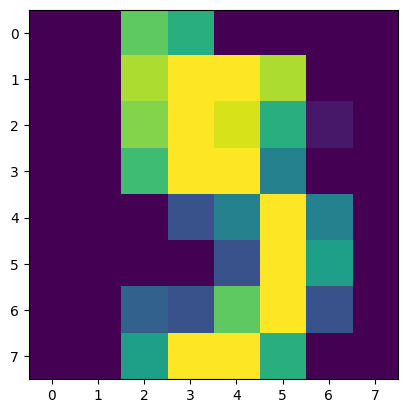

In [447]:
plt.imshow(X_digits[5].reshape(8, 8))

In [448]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [449]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [450]:
log_reg.score(X_test, y_test)

0.9622222222222222

In [451]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=50)),
        ("log_reg", LogisticRegression()),
    ])
pipeline.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [452]:
pipeline.score(X_test, y_test)

0.9711111111111111

## Using Clustering for Semi-Supervised Learning

In [453]:
X_train.shape

(1347, 64)

In the KMeans class, the transform() method measures the distance from each instance to every centroid

In [454]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # searching for the lowest distance from centroids
X_representative_digits = X_train[representative_digit_idx]

In [455]:
X_train.shape

(1347, 64)

In [456]:
X_digits_dist.shape

(1347, 50)

In [457]:
representative_digit_idx

array([  26, 1343,  422,  992,  323,  709,  661,  696,   82,  687,  707,
        917,  522, 1336, 1035,  841,  728,  213,  495, 1304,  591,  769,
        419,  676,  991,  147,  430,  672,  349, 1175,  736, 1311,  931,
       1325,  842,  206,   48,    2,  248,  837,  554, 1288, 1169,  731,
        461,  561,  466,  887,  630,   23], dtype=int64)

In [458]:
X_representative_digits

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  5.,  0.,  0.],
       [ 0.,  0., 10., ...,  5.,  0.,  0.],
       ...,
       [ 0.,  0., 11., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  0.,  0.]])

In [459]:
X_digits_dist[0]

array([55.55178948, 37.75730823, 46.50864689, 16.35155446, 48.68816485,
       42.72458777, 52.37137258, 44.236358  , 25.8284926 , 53.98962863,
       43.98028678, 54.17629951, 36.58052235, 46.22504949, 37.37355846,
       42.0399661 , 50.64921026, 40.37762694, 31.62178837, 61.32307928,
       49.79594102, 43.15708212, 50.70648833, 35.50318817, 51.74428906,
       30.85916539, 57.35488936, 38.75372714, 50.43000283, 42.33028003,
       61.57440621, 32.41071264, 49.90207123, 59.44394192, 59.04389738,
       44.19081808, 44.38601097, 43.03451391, 46.50617399, 56.85022513,
       62.23398946, 36.15380775, 40.22901568, 50.19097457, 36.82935289,
       48.93774281, 35.9760129 , 43.84959954, 44.3876489 , 52.63418415])

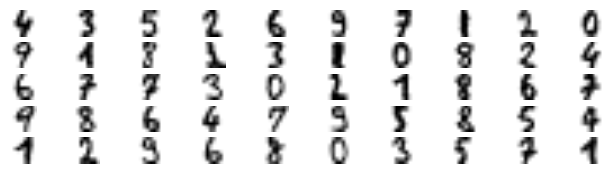

In [460]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.savefig("images/unsupervised_learning/representative_images_diagram")
plt.show()

Now, we have just 50 instances, each of them is representative image of its cluster

next, we manually label the representative images we just found and train a model on the representative images